<a href="https://colab.research.google.com/github/chaos1231107/2023_2nd_simester/blob/kinematics/2023_11_24_%EA%B0%95%EC%9D%98%EC%9E%90%EB%A3%8C_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
def f(x):
    x1, x2 = x[:,0:1], x[:,1:]
    y1 = x1 + x2
    y2 = x1 * x2
    return np.concatenate((y1, y2),axis=-1)

In [ ]:
x1_train = np.random.uniform(-2,2,size=(100,1))
x2_train = np.random.uniform(-2,2,size=(100,1))
x_train = np.concatenate((x1_train, x2_train),axis=-1)
y_train = f(x_train)

In [ ]:
x1_test = np.random.uniform(-2,2,size=(20,1))
x2_test = np.random.uniform(-2,2,size=(20,1))
x_test = np.concatenate((x1_test,x2_test),axis=-1)
y_test = f(x_test)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10602 (41.41 KB)
Trainable params: 10602 (41.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x_train, y_train, epochs=1000, validation_data = (x_test, y_test))

Epoch 1/1000
4/4 [==============================] - 1s 84ms/step - loss: 2.3838 - val_loss: 1.1233
Epoch 2/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.9777 - val_loss: 0.9195
Epoch 3/1000
4/4 [==============================] - 0s 20ms/step - loss: 1.6681 - val_loss: 0.7434
Epoch 4/1000
4/4 [==============================] - 0s 18ms/step - loss: 1.3871 - val_loss: 0.5875
Epoch 5/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.1538 - val_loss: 0.4604
Epoch 6/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.9369 - val_loss: 0.3508
Epoch 7/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.7500 - val_loss: 0.2655
Epoch 8/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.5936 - val_loss: 0.1997
Epoch 9/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.4563 - val_loss: 0.1489
Epoch 10/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.3487 - val_loss: 0.1146
Epoch 11/

In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 122ms/step


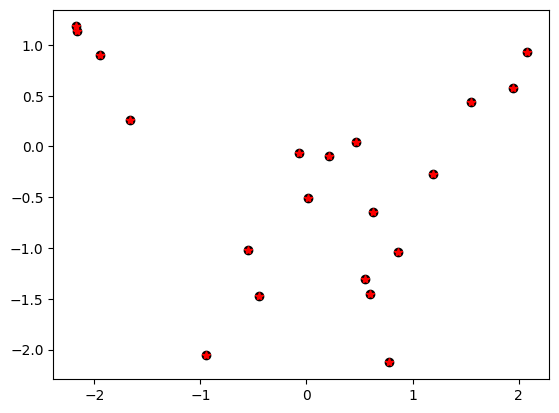

In [ ]:
plt.plot(y_pred[:,0], y_pred[:,1], 'ko')
plt.plot(y_pred[:,0], y_pred[:,1],'*r')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-2)

In [ ]:
def loss_fn(y_true, y_pred):
    loss = tf.math.square(y_true - y_pred)
    return tf.math.reduce_mean(loss)

In [ ]:
epochs = 1000
for num_epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        loss = loss_fn(y_train, y_pred)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print('Epoch %s: Loss %.4f' %(num_epoch, loss.numpy()))

Epoch 0: Loss 2.4240
Epoch 1: Loss 2.2604
Epoch 2: Loss 2.1116
Epoch 3: Loss 1.9757
Epoch 4: Loss 1.8515
Epoch 5: Loss 1.7371
Epoch 6: Loss 1.6331
Epoch 7: Loss 1.5439
Epoch 8: Loss 1.4626
Epoch 9: Loss 1.3872
Epoch 10: Loss 1.3174
Epoch 11: Loss 1.2528
Epoch 12: Loss 1.1936
Epoch 13: Loss 1.1392
Epoch 14: Loss 1.0878
Epoch 15: Loss 1.0376
Epoch 16: Loss 0.9875
Epoch 17: Loss 0.9379
Epoch 18: Loss 0.8894
Epoch 19: Loss 0.8433
Epoch 20: Loss 0.8004
Epoch 21: Loss 0.7612
Epoch 22: Loss 0.7253
Epoch 23: Loss 0.6917
Epoch 24: Loss 0.6596
Epoch 25: Loss 0.6285
Epoch 26: Loss 0.5979
Epoch 27: Loss 0.5676
Epoch 28: Loss 0.5384
Epoch 29: Loss 0.5110
Epoch 30: Loss 0.4849
Epoch 31: Loss 0.4604
Epoch 32: Loss 0.4376
Epoch 33: Loss 0.4168
Epoch 34: Loss 0.3978
Epoch 35: Loss 0.3802
Epoch 36: Loss 0.3638
Epoch 37: Loss 0.3482
Epoch 38: Loss 0.3334
Epoch 39: Loss 0.3197
Epoch 40: Loss 0.3071
Epoch 41: Loss 0.2960
Epoch 42: Loss 0.2861
Epoch 43: Loss 0.2771
Epoch 44: Loss 0.2686
Epoch 45: Loss 0.260

1/1 [==============================] - 0s 20ms/step


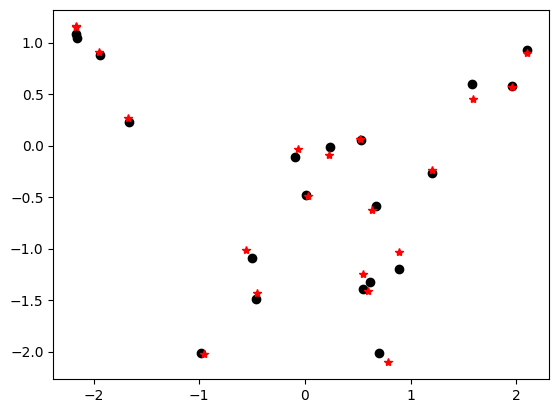

In [ ]:
y_pred = model.predict(x_test)
plt.plot(y_pred[:,0], y_pred[:,1],'ko')
plt.plot(y_test[:,0], y_test[:,1], '*r')
plt.show()

In [ ]:
#model predict Theta(t)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-2)

In [ ]:
def loss_fn(y_true, y_pred):
    loss = tf.math.square(y_true-y_pred)
    return tf.math.reduce_mean(loss)

In [ ]:
def omega(model,t):
    with tf.GradientTape() as tape:
        t_tf = tf.constant(t)
        tape.watch(t_tf)
        theta = model(t_tf)
    omega_cal = tape.gradient(theta, t_tf)
    del tape
    return omega_cal

In [ ]:
t = np.linspace(0,2,100)

In [ ]:
epochs = 1000
for num_epoch in range(epochs):
    with tf.GradientTape() as tape:
        omega_cal = omega(model, t)
        loss = loss_fn(np.pi, omega_cal)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print('Epoch %s : Loss %.4f' % (num_epoch, loss.numpy()))

Epoch 0 : Loss 10.4512
Epoch 1 : Loss 10.1518
Epoch 2 : Loss 9.8594
Epoch 3 : Loss 9.5738
Epoch 4 : Loss 9.3021
Epoch 5 : Loss 9.0369
Epoch 6 : Loss 8.7762


Epoch 7 : Loss 8.5198
Epoch 8 : Loss 8.2670
Epoch 9 : Loss 8.0174
Epoch 10 : Loss 7.7702
Epoch 11 : Loss 7.5246
Epoch 12 : Loss 7.2799
Epoch 13 : Loss 7.0351


Epoch 14 : Loss 6.7892
Epoch 15 : Loss 6.5410
Epoch 16 : Loss 6.2891
Epoch 17 : Loss 6.0330
Epoch 18 : Loss 5.7726
Epoch 19 : Loss 5.5077
Epoch 20 : Loss 5.2383


Epoch 21 : Loss 4.9645
Epoch 22 : Loss 4.6865
Epoch 23 : Loss 4.4049
Epoch 24 : Loss 4.1202
Epoch 25 : Loss 3.8333
Epoch 26 : Loss 3.5453
Epoch 27 : Loss 3.2573


Epoch 28 : Loss 2.9710
Epoch 29 : Loss 2.6877
Epoch 30 : Loss 2.4093
Epoch 31 : Loss 2.1376
Epoch 32 : Loss 1.8748
Epoch 33 : Loss 1.6229
Epoch 34 : Loss 1.3841


Epoch 35 : Loss 1.1607
Epoch 36 : Loss 0.9610
Epoch 37 : Loss 0.7803
Epoch 38 : Loss 0.6190
Epoch 39 : Loss 0.4786
Epoch 40 : Loss 0.3604
Epoch 41 : Loss 0.2648


Epoch 42 : Loss 0.1919
Epoch 43 : Loss 0.1411
Epoch 44 : Loss 0.1109
Epoch 45 : Loss 0.0991
Epoch 46 : Loss 0.1028
Epoch 47 : Loss 0.1184
Epoch 48 : Loss 0.1423


Epoch 49 : Loss 0.1703
Epoch 50 : Loss 0.1989
Epoch 51 : Loss 0.2248
Epoch 52 : Loss 0.2455
Epoch 53 : Loss 0.2595
Epoch 54 : Loss 0.2659
Epoch 55 : Loss 0.2648


Epoch 56 : Loss 0.2571
Epoch 57 : Loss 0.2439
Epoch 58 : Loss 0.2268
Epoch 59 : Loss 0.2074
Epoch 60 : Loss 0.1872
Epoch 61 : Loss 0.1676
Epoch 62 : Loss 0.1497


Epoch 63 : Loss 0.1341
Epoch 64 : Loss 0.1214
Epoch 65 : Loss 0.1117
Epoch 66 : Loss 0.1049
Epoch 67 : Loss 0.1008
Epoch 68 : Loss 0.0989
Epoch 69 : Loss 0.0989


Epoch 70 : Loss 0.1002
Epoch 71 : Loss 0.1023
Epoch 72 : Loss 0.1049
Epoch 73 : Loss 0.1076
Epoch 74 : Loss 0.1100
Epoch 75 : Loss 0.1119
Epoch 76 : Loss 0.1133


Epoch 77 : Loss 0.1140
Epoch 78 : Loss 0.1141
Epoch 79 : Loss 0.1136
Epoch 80 : Loss 0.1125
Epoch 81 : Loss 0.1111
Epoch 82 : Loss 0.1094
Epoch 83 : Loss 0.1076


Epoch 84 : Loss 0.1058
Epoch 85 : Loss 0.1041
Epoch 86 : Loss 0.1025
Epoch 87 : Loss 0.1012
Epoch 88 : Loss 0.1002
Epoch 89 : Loss 0.0994


Epoch 90 : Loss 0.0990
Epoch 91 : Loss 0.0987
Epoch 92 : Loss 0.0987
Epoch 93 : Loss 0.0988
Epoch 94 : Loss 0.0991


Epoch 95 : Loss 0.0994
Epoch 96 : Loss 0.0997
Epoch 97 : Loss 0.0999
Epoch 98 : Loss 0.1001
Epoch 99 : Loss 0.1002


Epoch 100 : Loss 0.1003
Epoch 101 : Loss 0.1002
Epoch 102 : Loss 0.1001
Epoch 103 : Loss 0.1000
Epoch 104 : Loss 0.0998


Epoch 105 : Loss 0.0996
Epoch 106 : Loss 0.0994
Epoch 107 : Loss 0.0992
Epoch 108 : Loss 0.0990
Epoch 109 : Loss 0.0989


Epoch 110 : Loss 0.0988
Epoch 111 : Loss 0.0987
Epoch 112 : Loss 0.0987
Epoch 113 : Loss 0.0987
Epoch 114 : Loss 0.0987


Epoch 115 : Loss 0.0987
Epoch 116 : Loss 0.0988
Epoch 117 : Loss 0.0988
Epoch 118 : Loss 0.0988
Epoch 119 : Loss 0.0989


Epoch 120 : Loss 0.0989
Epoch 121 : Loss 0.0989
Epoch 122 : Loss 0.0989
Epoch 123 : Loss 0.0989
Epoch 124 : Loss 0.0988


Epoch 125 : Loss 0.0988
Epoch 126 : Loss 0.0988
Epoch 127 : Loss 0.0988
Epoch 128 : Loss 0.0987
Epoch 129 : Loss 0.0987
Epoch 130 : Loss 0.0987


Epoch 131 : Loss 0.0987
Epoch 132 : Loss 0.0987
Epoch 133 : Loss 0.0987
Epoch 134 : Loss 0.0987
Epoch 135 : Loss 0.0987


Epoch 136 : Loss 0.0987
Epoch 137 : Loss 0.0987
Epoch 138 : Loss 0.0987
Epoch 139 : Loss 0.0987
Epoch 140 : Loss 0.0987
Epoch 141 : Loss 0.0987


Epoch 142 : Loss 0.0987
Epoch 143 : Loss 0.0987
Epoch 144 : Loss 0.0987
Epoch 145 : Loss 0.0987
Epoch 146 : Loss 0.0987
Epoch 147 : Loss 0.0987


Epoch 148 : Loss 0.0987
Epoch 149 : Loss 0.0987
Epoch 150 : Loss 0.0987
Epoch 151 : Loss 0.0987
Epoch 152 : Loss 0.0987
Epoch 153 : Loss 0.0987


Epoch 154 : Loss 0.0987
Epoch 155 : Loss 0.0987
Epoch 156 : Loss 0.0987
Epoch 157 : Loss 0.0987
Epoch 158 : Loss 0.0987
Epoch 159 : Loss 0.0987


Epoch 160 : Loss 0.0987
Epoch 161 : Loss 0.0987
Epoch 162 : Loss 0.0987
Epoch 163 : Loss 0.0987
Epoch 164 : Loss 0.0987
Epoch 165 : Loss 0.0987


Epoch 166 : Loss 0.0987
Epoch 167 : Loss 0.0987
Epoch 168 : Loss 0.0987
Epoch 169 : Loss 0.0987
Epoch 170 : Loss 0.0987


Epoch 171 : Loss 0.0987
Epoch 172 : Loss 0.0987
Epoch 173 : Loss 0.0987
Epoch 174 : Loss 0.0987
Epoch 175 : Loss 0.0987
Epoch 176 : Loss 0.0987


Epoch 177 : Loss 0.0987
Epoch 178 : Loss 0.0987
Epoch 179 : Loss 0.0987
Epoch 180 : Loss 0.0987
Epoch 181 : Loss 0.0987
Epoch 182 : Loss 0.0987


Epoch 183 : Loss 0.0987
Epoch 184 : Loss 0.0987
Epoch 185 : Loss 0.0987
Epoch 186 : Loss 0.0987
Epoch 187 : Loss 0.0987
Epoch 188 : Loss 0.0987


Epoch 189 : Loss 0.0987
Epoch 190 : Loss 0.0987
Epoch 191 : Loss 0.0987
Epoch 192 : Loss 0.0987
Epoch 193 : Loss 0.0987


Epoch 194 : Loss 0.0987
Epoch 195 : Loss 0.0987
Epoch 196 : Loss 0.0987
Epoch 197 : Loss 0.0987
Epoch 198 : Loss 0.0987


Epoch 199 : Loss 0.0987
Epoch 200 : Loss 0.0987
Epoch 201 : Loss 0.0987
Epoch 202 : Loss 0.0987
Epoch 203 : Loss 0.0987
Epoch 204 : Loss 0.0987


Epoch 205 : Loss 0.0987
Epoch 206 : Loss 0.0987
Epoch 207 : Loss 0.0987
Epoch 208 : Loss 0.0987
Epoch 209 : Loss 0.0987


Epoch 210 : Loss 0.0987
Epoch 211 : Loss 0.0987
Epoch 212 : Loss 0.0987
Epoch 213 : Loss 0.0987
Epoch 214 : Loss 0.0987


Epoch 215 : Loss 0.0987
Epoch 216 : Loss 0.0987
Epoch 217 : Loss 0.0987
Epoch 218 : Loss 0.0987
Epoch 219 : Loss 0.0987
Epoch 220 : Loss 0.0987


Epoch 221 : Loss 0.0987
Epoch 222 : Loss 0.0987
Epoch 223 : Loss 0.0987
Epoch 224 : Loss 0.0987
Epoch 225 : Loss 0.0987


Epoch 226 : Loss 0.0987
Epoch 227 : Loss 0.0987
Epoch 228 : Loss 0.0987
Epoch 229 : Loss 0.0987
Epoch 230 : Loss 0.0987


Epoch 231 : Loss 0.0987
Epoch 232 : Loss 0.0987
Epoch 233 : Loss 0.0987
Epoch 234 : Loss 0.0987
Epoch 235 : Loss 0.0987
Epoch 236 : Loss 0.0987


Epoch 237 : Loss 0.0987
Epoch 238 : Loss 0.0987
Epoch 239 : Loss 0.0987
Epoch 240 : Loss 0.0987
Epoch 241 : Loss 0.0987
Epoch 242 : Loss 0.0987
Epoch 243 : Loss 0.0987


Epoch 244 : Loss 0.0987
Epoch 245 : Loss 0.0987
Epoch 246 : Loss 0.0987
Epoch 247 : Loss 0.0987
Epoch 248 : Loss 0.0987
Epoch 249 : Loss 0.0987
Epoch 250 : Loss 0.0987


Epoch 251 : Loss 0.0987
Epoch 252 : Loss 0.0987
Epoch 253 : Loss 0.0987
Epoch 254 : Loss 0.0987
Epoch 255 : Loss 0.0987
Epoch 256 : Loss 0.0987
Epoch 257 : Loss 0.0987


Epoch 258 : Loss 0.0987
Epoch 259 : Loss 0.0987
Epoch 260 : Loss 0.0987
Epoch 261 : Loss 0.0987
Epoch 262 : Loss 0.0987
Epoch 263 : Loss 0.0987
Epoch 264 : Loss 0.0987


Epoch 265 : Loss 0.0987
Epoch 266 : Loss 0.0987
Epoch 267 : Loss 0.0987
Epoch 268 : Loss 0.0987
Epoch 269 : Loss 0.0987
Epoch 270 : Loss 0.0987
Epoch 271 : Loss 0.0987


Epoch 272 : Loss 0.0987
Epoch 273 : Loss 0.0987
Epoch 274 : Loss 0.0987
Epoch 275 : Loss 0.0987
Epoch 276 : Loss 0.0987
Epoch 277 : Loss 0.0987


Epoch 278 : Loss 0.0987
Epoch 279 : Loss 0.0987
Epoch 280 : Loss 0.0987
Epoch 281 : Loss 0.0987
Epoch 282 : Loss 0.0987
Epoch 283 : Loss 0.0987


Epoch 284 : Loss 0.0987
Epoch 285 : Loss 0.0987
Epoch 286 : Loss 0.0987
Epoch 287 : Loss 0.0987
Epoch 288 : Loss 0.0987
Epoch 289 : Loss 0.0987


Epoch 290 : Loss 0.0987
Epoch 291 : Loss 0.0987
Epoch 292 : Loss 0.0987
Epoch 293 : Loss 0.0987
Epoch 294 : Loss 0.0987
Epoch 295 : Loss 0.0987
Epoch 296 : Loss 0.0987


Epoch 297 : Loss 0.0987
Epoch 298 : Loss 0.0987
Epoch 299 : Loss 0.0987
Epoch 300 : Loss 0.0987
Epoch 301 : Loss 0.0987
Epoch 302 : Loss 0.0987


Epoch 303 : Loss 0.0987
Epoch 304 : Loss 0.0987
Epoch 305 : Loss 0.0987
Epoch 306 : Loss 0.0987
Epoch 307 : Loss 0.0987
Epoch 308 : Loss 0.0987


Epoch 309 : Loss 0.0987
Epoch 310 : Loss 0.0987
Epoch 311 : Loss 0.0987
Epoch 312 : Loss 0.0987
Epoch 313 : Loss 0.0987
Epoch 314 : Loss 0.0987
Epoch 315 : Loss 0.0987


Epoch 316 : Loss 0.0987
Epoch 317 : Loss 0.0987
Epoch 318 : Loss 0.0987
Epoch 319 : Loss 0.0987
Epoch 320 : Loss 0.0987
Epoch 321 : Loss 0.0987
Epoch 322 : Loss 0.0987


Epoch 323 : Loss 0.0987
Epoch 324 : Loss 0.0987
Epoch 325 : Loss 0.0987
Epoch 326 : Loss 0.0987
Epoch 327 : Loss 0.0987
Epoch 328 : Loss 0.0987
Epoch 329 : Loss 0.0987


Epoch 330 : Loss 0.0987
Epoch 331 : Loss 0.0987
Epoch 332 : Loss 0.0987
Epoch 333 : Loss 0.0987
Epoch 334 : Loss 0.0987
Epoch 335 : Loss 0.0987
Epoch 336 : Loss 0.0987


Epoch 337 : Loss 0.0987
Epoch 338 : Loss 0.0987
Epoch 339 : Loss 0.0987
Epoch 340 : Loss 0.0987
Epoch 341 : Loss 0.0987
Epoch 342 : Loss 0.0987


Epoch 343 : Loss 0.0987
Epoch 344 : Loss 0.0987
Epoch 345 : Loss 0.0987
Epoch 346 : Loss 0.0987
Epoch 347 : Loss 0.0987
Epoch 348 : Loss 0.0987


Epoch 349 : Loss 0.0987
Epoch 350 : Loss 0.0987
Epoch 351 : Loss 0.0987
Epoch 352 : Loss 0.0987
Epoch 353 : Loss 0.0987
Epoch 354 : Loss 0.0987


Epoch 355 : Loss 0.0987
Epoch 356 : Loss 0.0987
Epoch 357 : Loss 0.0987
Epoch 358 : Loss 0.0987
Epoch 359 : Loss 0.0987
Epoch 360 : Loss 0.0987
Epoch 361 : Loss 0.0987


Epoch 362 : Loss 0.0987
Epoch 363 : Loss 0.0987
Epoch 364 : Loss 0.0987
Epoch 365 : Loss 0.0987
Epoch 366 : Loss 0.0987
Epoch 367 : Loss 0.0987


Epoch 368 : Loss 0.0987
Epoch 369 : Loss 0.0987
Epoch 370 : Loss 0.0987
Epoch 371 : Loss 0.0987
Epoch 372 : Loss 0.0987
Epoch 373 : Loss 0.0987
Epoch 374 : Loss 0.0987


Epoch 375 : Loss 0.0987
Epoch 376 : Loss 0.0987
Epoch 377 : Loss 0.0987
Epoch 378 : Loss 0.0987
Epoch 379 : Loss 0.0987
Epoch 380 : Loss 0.0987


Epoch 381 : Loss 0.0987
Epoch 382 : Loss 0.0987
Epoch 383 : Loss 0.0987
Epoch 384 : Loss 0.0987
Epoch 385 : Loss 0.0987
Epoch 386 : Loss 0.0987


Epoch 387 : Loss 0.0987
Epoch 388 : Loss 0.0987
Epoch 389 : Loss 0.0987
Epoch 390 : Loss 0.0987
Epoch 391 : Loss 0.0987
Epoch 392 : Loss 0.0987


Epoch 393 : Loss 0.0987
Epoch 394 : Loss 0.0987
Epoch 395 : Loss 0.0987
Epoch 396 : Loss 0.0987
Epoch 397 : Loss 0.0987
Epoch 398 : Loss 0.0987
Epoch 399 : Loss 0.0987


Epoch 400 : Loss 0.0987
Epoch 401 : Loss 0.0987
Epoch 402 : Loss 0.0987
Epoch 403 : Loss 0.0987
Epoch 404 : Loss 0.0987
Epoch 405 : Loss 0.0987
Epoch 406 : Loss 0.0987


Epoch 407 : Loss 0.0987
Epoch 408 : Loss 0.0987
Epoch 409 : Loss 0.0987
Epoch 410 : Loss 0.0987
Epoch 411 : Loss 0.0987
Epoch 412 : Loss 0.0987
Epoch 413 : Loss 0.0987


Epoch 414 : Loss 0.0987
Epoch 415 : Loss 0.0987
Epoch 416 : Loss 0.0987
Epoch 417 : Loss 0.0987
Epoch 418 : Loss 0.0987
Epoch 419 : Loss 0.0987
Epoch 420 : Loss 0.0987


Epoch 421 : Loss 0.0987
Epoch 422 : Loss 0.0987
Epoch 423 : Loss 0.0987
Epoch 424 : Loss 0.0987
Epoch 425 : Loss 0.0987
Epoch 426 : Loss 0.0987
Epoch 427 : Loss 0.0987


Epoch 428 : Loss 0.0987
Epoch 429 : Loss 0.0987
Epoch 430 : Loss 0.0987
Epoch 431 : Loss 0.0987
Epoch 432 : Loss 0.0987
Epoch 433 : Loss 0.0987


Epoch 434 : Loss 0.0987
Epoch 435 : Loss 0.0987
Epoch 436 : Loss 0.0987
Epoch 437 : Loss 0.0987
Epoch 438 : Loss 0.0987
Epoch 439 : Loss 0.0987


Epoch 440 : Loss 0.0987
Epoch 441 : Loss 0.0987
Epoch 442 : Loss 0.0987
Epoch 443 : Loss 0.0987
Epoch 444 : Loss 0.0987
Epoch 445 : Loss 0.0987


Epoch 446 : Loss 0.0987
Epoch 447 : Loss 0.0987
Epoch 448 : Loss 0.0987
Epoch 449 : Loss 0.0987
Epoch 450 : Loss 0.0987
Epoch 451 : Loss 0.0987


Epoch 452 : Loss 0.0987
Epoch 453 : Loss 0.0987
Epoch 454 : Loss 0.0987
Epoch 455 : Loss 0.0987
Epoch 456 : Loss 0.0987
Epoch 457 : Loss 0.0987


Epoch 458 : Loss 0.0987
Epoch 459 : Loss 0.0987
Epoch 460 : Loss 0.0987
Epoch 461 : Loss 0.0987
Epoch 462 : Loss 0.0987
Epoch 463 : Loss 0.0987
Epoch 464 : Loss 0.0987


Epoch 465 : Loss 0.0987
Epoch 466 : Loss 0.0987
Epoch 467 : Loss 0.0987
Epoch 468 : Loss 0.0987
Epoch 469 : Loss 0.0987
Epoch 470 : Loss 0.0987


Epoch 471 : Loss 0.0987
Epoch 472 : Loss 0.0987
Epoch 473 : Loss 0.0987
Epoch 474 : Loss 0.0987
Epoch 475 : Loss 0.0987
Epoch 476 : Loss 0.0987


Epoch 477 : Loss 0.0987
Epoch 478 : Loss 0.0987
Epoch 479 : Loss 0.0987
Epoch 480 : Loss 0.0987
Epoch 481 : Loss 0.0987
Epoch 482 : Loss 0.0987


Epoch 483 : Loss 0.0987
Epoch 484 : Loss 0.0987
Epoch 485 : Loss 0.0987
Epoch 486 : Loss 0.0987
Epoch 487 : Loss 0.0987
Epoch 488 : Loss 0.0987


Epoch 489 : Loss 0.0987
Epoch 490 : Loss 0.0987
Epoch 491 : Loss 0.0987
Epoch 492 : Loss 0.0987
Epoch 493 : Loss 0.0987
Epoch 494 : Loss 0.0987


Epoch 495 : Loss 0.0987
Epoch 496 : Loss 0.0987
Epoch 497 : Loss 0.0987
Epoch 498 : Loss 0.0987
Epoch 499 : Loss 0.0987
Epoch 500 : Loss 0.0987


Epoch 501 : Loss 0.0987
Epoch 502 : Loss 0.0987
Epoch 503 : Loss 0.0987
Epoch 504 : Loss 0.0987
Epoch 505 : Loss 0.0987
Epoch 506 : Loss 0.0987
Epoch 507 : Loss 0.0987


Epoch 508 : Loss 0.0987
Epoch 509 : Loss 0.0987
Epoch 510 : Loss 0.0987
Epoch 511 : Loss 0.0987
Epoch 512 : Loss 0.0987
Epoch 513 : Loss 0.0987


Epoch 514 : Loss 0.0987
Epoch 515 : Loss 0.0987
Epoch 516 : Loss 0.0987
Epoch 517 : Loss 0.0987
Epoch 518 : Loss 0.0987
Epoch 519 : Loss 0.0987


Epoch 520 : Loss 0.0987
Epoch 521 : Loss 0.0987
Epoch 522 : Loss 0.0987
Epoch 523 : Loss 0.0987
Epoch 524 : Loss 0.0987
Epoch 525 : Loss 0.0987
Epoch 526 : Loss 0.0987


Epoch 527 : Loss 0.0987
Epoch 528 : Loss 0.0987
Epoch 529 : Loss 0.0987
Epoch 530 : Loss 0.0987
Epoch 531 : Loss 0.0987


Epoch 532 : Loss 0.0987
Epoch 533 : Loss 0.0987
Epoch 534 : Loss 0.0987
Epoch 535 : Loss 0.0987
Epoch 536 : Loss 0.0987


Epoch 537 : Loss 0.0987
Epoch 538 : Loss 0.0987
Epoch 539 : Loss 0.0987
Epoch 540 : Loss 0.0987
Epoch 541 : Loss 0.0987
Epoch 542 : Loss 0.0987


Epoch 543 : Loss 0.0987
Epoch 544 : Loss 0.0987
Epoch 545 : Loss 0.0987
Epoch 546 : Loss 0.0987
Epoch 547 : Loss 0.0987
Epoch 548 : Loss 0.0987


Epoch 549 : Loss 0.0987
Epoch 550 : Loss 0.0987
Epoch 551 : Loss 0.0987
Epoch 552 : Loss 0.0987
Epoch 553 : Loss 0.0987
Epoch 554 : Loss 0.0987


Epoch 555 : Loss 0.0987
Epoch 556 : Loss 0.0987
Epoch 557 : Loss 0.0987
Epoch 558 : Loss 0.0987
Epoch 559 : Loss 0.0987
Epoch 560 : Loss 0.0987


Epoch 561 : Loss 0.0987
Epoch 562 : Loss 0.0987
Epoch 563 : Loss 0.0987
Epoch 564 : Loss 0.0987
Epoch 565 : Loss 0.0987
Epoch 566 : Loss 0.0987


Epoch 567 : Loss 0.0987
Epoch 568 : Loss 0.0987
Epoch 569 : Loss 0.0987
Epoch 570 : Loss 0.0987
Epoch 571 : Loss 0.0987


Epoch 572 : Loss 0.0987
Epoch 573 : Loss 0.0987
Epoch 574 : Loss 0.0987
Epoch 575 : Loss 0.0987
Epoch 576 : Loss 0.0987


Epoch 577 : Loss 0.0987
Epoch 578 : Loss 0.0987
Epoch 579 : Loss 0.0987
Epoch 580 : Loss 0.0987
Epoch 581 : Loss 0.0987
Epoch 582 : Loss 0.0987


Epoch 583 : Loss 0.0987
Epoch 584 : Loss 0.0987
Epoch 585 : Loss 0.0987
Epoch 586 : Loss 0.0987
Epoch 587 : Loss 0.0987
Epoch 588 : Loss 0.0987


Epoch 589 : Loss 0.0987
Epoch 590 : Loss 0.0987
Epoch 591 : Loss 0.0987
Epoch 592 : Loss 0.0987
Epoch 593 : Loss 0.0987


Epoch 594 : Loss 0.0987
Epoch 595 : Loss 0.0987
Epoch 596 : Loss 0.0987
Epoch 597 : Loss 0.0987
Epoch 598 : Loss 0.0987


Epoch 599 : Loss 0.0987
Epoch 600 : Loss 0.0987
Epoch 601 : Loss 0.0987
Epoch 602 : Loss 0.0987
Epoch 603 : Loss 0.0987


Epoch 604 : Loss 0.0987
Epoch 605 : Loss 0.0987
Epoch 606 : Loss 0.0987
Epoch 607 : Loss 0.0987
Epoch 608 : Loss 0.0987
Epoch 609 : Loss 0.0987


Epoch 610 : Loss 0.0987
Epoch 611 : Loss 0.0987
Epoch 612 : Loss 0.0987
Epoch 613 : Loss 0.0987
Epoch 614 : Loss 0.0987


Epoch 615 : Loss 0.0987
Epoch 616 : Loss 0.0987
Epoch 617 : Loss 0.0987
Epoch 618 : Loss 0.0987
Epoch 619 : Loss 0.0987


Epoch 620 : Loss 0.0987
Epoch 621 : Loss 0.0987
Epoch 622 : Loss 0.0987
Epoch 623 : Loss 0.0987
Epoch 624 : Loss 0.0987
Epoch 625 : Loss 0.0987


Epoch 626 : Loss 0.0987
Epoch 627 : Loss 0.0987
Epoch 628 : Loss 0.0987
Epoch 629 : Loss 0.0987
Epoch 630 : Loss 0.0987
Epoch 631 : Loss 0.0987


Epoch 632 : Loss 0.0987
Epoch 633 : Loss 0.0987
Epoch 634 : Loss 0.0987
Epoch 635 : Loss 0.0987
Epoch 636 : Loss 0.0987


Epoch 637 : Loss 0.0987
Epoch 638 : Loss 0.0987
Epoch 639 : Loss 0.0987
Epoch 640 : Loss 0.0987
Epoch 641 : Loss 0.0987
Epoch 642 : Loss 0.0987


Epoch 643 : Loss 0.0987
Epoch 644 : Loss 0.0987
Epoch 645 : Loss 0.0987
Epoch 646 : Loss 0.0987
Epoch 647 : Loss 0.0987


Epoch 648 : Loss 0.0987
Epoch 649 : Loss 0.0987
Epoch 650 : Loss 0.0987
Epoch 651 : Loss 0.0987
Epoch 652 : Loss 0.0987
Epoch 653 : Loss 0.0987


Epoch 654 : Loss 0.0987
Epoch 655 : Loss 0.0987
Epoch 656 : Loss 0.0987
Epoch 657 : Loss 0.0987


Epoch 658 : Loss 0.0987
Epoch 659 : Loss 0.0987
Epoch 660 : Loss 0.0987
Epoch 661 : Loss 0.0987


Epoch 662 : Loss 0.0987
Epoch 663 : Loss 0.0987
Epoch 664 : Loss 0.0987
Epoch 665 : Loss 0.0987
Epoch 666 : Loss 0.0987


Epoch 667 : Loss 0.0987
Epoch 668 : Loss 0.0987
Epoch 669 : Loss 0.0987
Epoch 670 : Loss 0.0987
Epoch 671 : Loss 0.0987


Epoch 672 : Loss 0.0987
Epoch 673 : Loss 0.0987
Epoch 674 : Loss 0.0987
Epoch 675 : Loss 0.0987
Epoch 676 : Loss 0.0987
Epoch 677 : Loss 0.0987


Epoch 678 : Loss 0.0987
Epoch 679 : Loss 0.0987
Epoch 680 : Loss 0.0987
Epoch 681 : Loss 0.0987
Epoch 682 : Loss 0.0987
Epoch 683 : Loss 0.0987


Epoch 684 : Loss 0.0987
Epoch 685 : Loss 0.0987
Epoch 686 : Loss 0.0987
Epoch 687 : Loss 0.0987
Epoch 688 : Loss 0.0987
Epoch 689 : Loss 0.0987


Epoch 690 : Loss 0.0987
Epoch 691 : Loss 0.0987
Epoch 692 : Loss 0.0987
Epoch 693 : Loss 0.0987
Epoch 694 : Loss 0.0987
Epoch 695 : Loss 0.0987


Epoch 696 : Loss 0.0987
Epoch 697 : Loss 0.0987
Epoch 698 : Loss 0.0987
Epoch 699 : Loss 0.0987
Epoch 700 : Loss 0.0987
Epoch 701 : Loss 0.0987


Epoch 702 : Loss 0.0987
Epoch 703 : Loss 0.0987
Epoch 704 : Loss 0.0987
Epoch 705 : Loss 0.0987
Epoch 706 : Loss 0.0987


Epoch 707 : Loss 0.0987
Epoch 708 : Loss 0.0987
Epoch 709 : Loss 0.0987
Epoch 710 : Loss 0.0987
Epoch 711 : Loss 0.0987
Epoch 712 : Loss 0.0987


Epoch 713 : Loss 0.0987
Epoch 714 : Loss 0.0987
Epoch 715 : Loss 0.0987
Epoch 716 : Loss 0.0987
Epoch 717 : Loss 0.0987


Epoch 718 : Loss 0.0987
Epoch 719 : Loss 0.0987
Epoch 720 : Loss 0.0987
Epoch 721 : Loss 0.0987
Epoch 722 : Loss 0.0987


Epoch 723 : Loss 0.0987
Epoch 724 : Loss 0.0987
Epoch 725 : Loss 0.0987
Epoch 726 : Loss 0.0987
Epoch 727 : Loss 0.0987
Epoch 728 : Loss 0.0987


Epoch 729 : Loss 0.0987
Epoch 730 : Loss 0.0987
Epoch 731 : Loss 0.0987
Epoch 732 : Loss 0.0987
Epoch 733 : Loss 0.0987
Epoch 734 : Loss 0.0987


Epoch 735 : Loss 0.0987
Epoch 736 : Loss 0.0987
Epoch 737 : Loss 0.0987
Epoch 738 : Loss 0.0987
Epoch 739 : Loss 0.0987
Epoch 740 : Loss 0.0987


Epoch 741 : Loss 0.0987
Epoch 742 : Loss 0.0987
Epoch 743 : Loss 0.0987
Epoch 744 : Loss 0.0987
Epoch 745 : Loss 0.0987
Epoch 746 : Loss 0.0987


Epoch 747 : Loss 0.0987
Epoch 748 : Loss 0.0987
Epoch 749 : Loss 0.0987
Epoch 750 : Loss 0.0987
Epoch 751 : Loss 0.0987
Epoch 752 : Loss 0.0987


Epoch 753 : Loss 0.0987
Epoch 754 : Loss 0.0987
Epoch 755 : Loss 0.0987
Epoch 756 : Loss 0.0987
Epoch 757 : Loss 0.0987
Epoch 758 : Loss 0.0987


Epoch 759 : Loss 0.0987
Epoch 760 : Loss 0.0987
Epoch 761 : Loss 0.0987
Epoch 762 : Loss 0.0987
Epoch 763 : Loss 0.0987
Epoch 764 : Loss 0.0987


Epoch 765 : Loss 0.0987
Epoch 766 : Loss 0.0987
Epoch 767 : Loss 0.0987
Epoch 768 : Loss 0.0987
Epoch 769 : Loss 0.0987
Epoch 770 : Loss 0.0987


Epoch 771 : Loss 0.0987
Epoch 772 : Loss 0.0987
Epoch 773 : Loss 0.0987
Epoch 774 : Loss 0.0987
Epoch 775 : Loss 0.0987
Epoch 776 : Loss 0.0987


Epoch 777 : Loss 0.0987
Epoch 778 : Loss 0.0987
Epoch 779 : Loss 0.0987
Epoch 780 : Loss 0.0987
Epoch 781 : Loss 0.0987
Epoch 782 : Loss 0.0987


Epoch 783 : Loss 0.0987
Epoch 784 : Loss 0.0987
Epoch 785 : Loss 0.0987
Epoch 786 : Loss 0.0987
Epoch 787 : Loss 0.0987
Epoch 788 : Loss 0.0987


Epoch 789 : Loss 0.0987
Epoch 790 : Loss 0.0987
Epoch 791 : Loss 0.0987
Epoch 792 : Loss 0.0987
Epoch 793 : Loss 0.0987
Epoch 794 : Loss 0.0987


Epoch 795 : Loss 0.0987
Epoch 796 : Loss 0.0987
Epoch 797 : Loss 0.0987
Epoch 798 : Loss 0.0987
Epoch 799 : Loss 0.0987
Epoch 800 : Loss 0.0987


Epoch 801 : Loss 0.0987
Epoch 802 : Loss 0.0987
Epoch 803 : Loss 0.0987
Epoch 804 : Loss 0.0987
Epoch 805 : Loss 0.0987
Epoch 806 : Loss 0.0987


Epoch 807 : Loss 0.0987
Epoch 808 : Loss 0.0987
Epoch 809 : Loss 0.0987
Epoch 810 : Loss 0.0987
Epoch 811 : Loss 0.0987
Epoch 812 : Loss 0.0987


Epoch 813 : Loss 0.0987
Epoch 814 : Loss 0.0987
Epoch 815 : Loss 0.0987
Epoch 816 : Loss 0.0987
Epoch 817 : Loss 0.0987
Epoch 818 : Loss 0.0987


Epoch 819 : Loss 0.0987
Epoch 820 : Loss 0.0987
Epoch 821 : Loss 0.0987
Epoch 822 : Loss 0.0987
Epoch 823 : Loss 0.0987
Epoch 824 : Loss 0.0987


Epoch 825 : Loss 0.0987
Epoch 826 : Loss 0.0987
Epoch 827 : Loss 0.0987
Epoch 828 : Loss 0.0987
Epoch 829 : Loss 0.0987
Epoch 830 : Loss 0.0987
Epoch 831 : Loss 0.0987


Epoch 832 : Loss 0.0987
Epoch 833 : Loss 0.0987
Epoch 834 : Loss 0.0987
Epoch 835 : Loss 0.0987
Epoch 836 : Loss 0.0987
Epoch 837 : Loss 0.0987
Epoch 838 : Loss 0.0987


Epoch 839 : Loss 0.0987
Epoch 840 : Loss 0.0987
Epoch 841 : Loss 0.0987
Epoch 842 : Loss 0.0987
Epoch 843 : Loss 0.0987
Epoch 844 : Loss 0.0987
Epoch 845 : Loss 0.0987


Epoch 846 : Loss 0.0987
Epoch 847 : Loss 0.0987
Epoch 848 : Loss 0.0987
Epoch 849 : Loss 0.0987
Epoch 850 : Loss 0.0987
Epoch 851 : Loss 0.0987
Epoch 852 : Loss 0.0987


Epoch 853 : Loss 0.0987
Epoch 854 : Loss 0.0987
Epoch 855 : Loss 0.0987
Epoch 856 : Loss 0.0987
Epoch 857 : Loss 0.0987
Epoch 858 : Loss 0.0987
Epoch 859 : Loss 0.0987


Epoch 860 : Loss 0.0987
Epoch 861 : Loss 0.0987
Epoch 862 : Loss 0.0987
Epoch 863 : Loss 0.0987
Epoch 864 : Loss 0.0987
Epoch 865 : Loss 0.0987
Epoch 866 : Loss 0.0987


Epoch 867 : Loss 0.0987
Epoch 868 : Loss 0.0987
Epoch 869 : Loss 0.0987
Epoch 870 : Loss 0.0987
Epoch 871 : Loss 0.0987
Epoch 872 : Loss 0.0987
Epoch 873 : Loss 0.0987


Epoch 874 : Loss 0.0987
Epoch 875 : Loss 0.0987
Epoch 876 : Loss 0.0987
Epoch 877 : Loss 0.0987
Epoch 878 : Loss 0.0987
Epoch 879 : Loss 0.0987


Epoch 880 : Loss 0.0987
Epoch 881 : Loss 0.0987
Epoch 882 : Loss 0.0987
Epoch 883 : Loss 0.0987
Epoch 884 : Loss 0.0987
Epoch 885 : Loss 0.0987
Epoch 886 : Loss 0.0987


Epoch 887 : Loss 0.0987
Epoch 888 : Loss 0.0987
Epoch 889 : Loss 0.0987
Epoch 890 : Loss 0.0987
Epoch 891 : Loss 0.0987


Epoch 892 : Loss 0.0987
Epoch 893 : Loss 0.0987
Epoch 894 : Loss 0.0987
Epoch 895 : Loss 0.0987
Epoch 896 : Loss 0.0987
Epoch 897 : Loss 0.0987


Epoch 898 : Loss 0.0987
Epoch 899 : Loss 0.0987
Epoch 900 : Loss 0.0987
Epoch 901 : Loss 0.0987
Epoch 902 : Loss 0.0987
Epoch 903 : Loss 0.0987


Epoch 904 : Loss 0.0987
Epoch 905 : Loss 0.0987
Epoch 906 : Loss 0.0987
Epoch 907 : Loss 0.0987
Epoch 908 : Loss 0.0987
Epoch 909 : Loss 0.0987


Epoch 910 : Loss 0.0987
Epoch 911 : Loss 0.0987
Epoch 912 : Loss 0.0987
Epoch 913 : Loss 0.0987
Epoch 914 : Loss 0.0987
Epoch 915 : Loss 0.0987


Epoch 916 : Loss 0.0987
Epoch 917 : Loss 0.0987
Epoch 918 : Loss 0.0987
Epoch 919 : Loss 0.0987
Epoch 920 : Loss 0.0987
Epoch 921 : Loss 0.0987


Epoch 922 : Loss 0.0987
Epoch 923 : Loss 0.0987
Epoch 924 : Loss 0.0987
Epoch 925 : Loss 0.0987
Epoch 926 : Loss 0.0987
Epoch 927 : Loss 0.0987
Epoch 928 : Loss 0.0987


Epoch 929 : Loss 0.0987
Epoch 930 : Loss 0.0987
Epoch 931 : Loss 0.0987
Epoch 932 : Loss 0.0987
Epoch 933 : Loss 0.0987
Epoch 934 : Loss 0.0987
Epoch 935 : Loss 0.0987


Epoch 936 : Loss 0.0987
Epoch 937 : Loss 0.0987
Epoch 938 : Loss 0.0987
Epoch 939 : Loss 0.0987
Epoch 940 : Loss 0.0987
Epoch 941 : Loss 0.0987
Epoch 942 : Loss 0.0987


Epoch 943 : Loss 0.0987
Epoch 944 : Loss 0.0987
Epoch 945 : Loss 0.0987
Epoch 946 : Loss 0.0987
Epoch 947 : Loss 0.0987
Epoch 948 : Loss 0.0987
Epoch 949 : Loss 0.0987


Epoch 950 : Loss 0.0987
Epoch 951 : Loss 0.0987
Epoch 952 : Loss 0.0987
Epoch 953 : Loss 0.0987
Epoch 954 : Loss 0.0987


Epoch 955 : Loss 0.0987
Epoch 956 : Loss 0.0987
Epoch 957 : Loss 0.0987
Epoch 958 : Loss 0.0987
Epoch 959 : Loss 0.0987
Epoch 960 : Loss 0.0987


Epoch 961 : Loss 0.0987
Epoch 962 : Loss 0.0987
Epoch 963 : Loss 0.0987
Epoch 964 : Loss 0.0987
Epoch 965 : Loss 0.0987
Epoch 966 : Loss 0.0987
Epoch 967 : Loss 0.0987


Epoch 968 : Loss 0.0987
Epoch 969 : Loss 0.0987
Epoch 970 : Loss 0.0987
Epoch 971 : Loss 0.0987
Epoch 972 : Loss 0.0987
Epoch 973 : Loss 0.0987
Epoch 974 : Loss 0.0987


Epoch 975 : Loss 0.0987
Epoch 976 : Loss 0.0987
Epoch 977 : Loss 0.0987
Epoch 978 : Loss 0.0987
Epoch 979 : Loss 0.0987
Epoch 980 : Loss 0.0987


Epoch 981 : Loss 0.0987
Epoch 982 : Loss 0.0987
Epoch 983 : Loss 0.0987
Epoch 984 : Loss 0.0987
Epoch 985 : Loss 0.0987
Epoch 986 : Loss 0.0987


Epoch 987 : Loss 0.0987
Epoch 988 : Loss 0.0987
Epoch 989 : Loss 0.0987
Epoch 990 : Loss 0.0987
Epoch 991 : Loss 0.0987
Epoch 992 : Loss 0.0987


Epoch 993 : Loss 0.0987
Epoch 994 : Loss 0.0987
Epoch 995 : Loss 0.0987
Epoch 996 : Loss 0.0987
Epoch 997 : Loss 0.0987
Epoch 998 : Loss 0.0987
Epoch 999 : Loss 0.0987


4/4 [==============================] - 0s 5ms/step


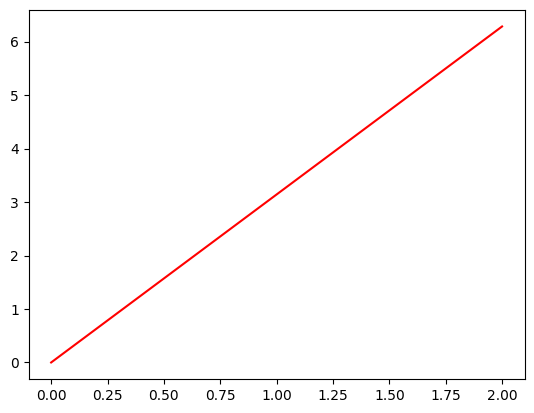

In [ ]:
plt.plot(t, model.predict(t), 'r')
plt.show()

4/4 [==============================] - 0s 3ms/step


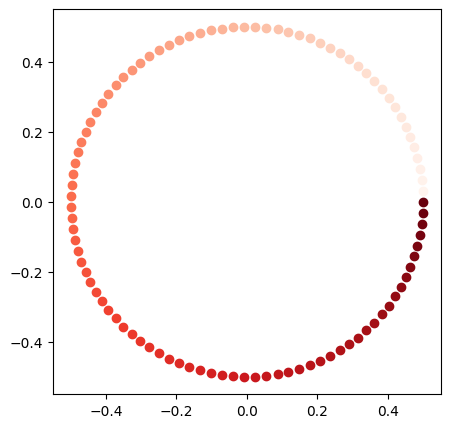

In [ ]:
from matplotlib.pyplot import cm
color = cm.Reds(np.linspace(0,1,100))
theta = model.predict(t)
plt.figure(figsize=(5,5))
for x,y,c in zip(0.5*np.cos(theta),0.5*np.sin(theta), color):
    plt.scatter(x,y,color=c)

In [ ]:
#initial condition
epochs = 1000
for num_epoch in range(epochs):
    with tf.GradientTape() as tape:
        omega_cal = omega(model,t)
        loss1 = loss_fn(np.pi, omega_cal)
        loss2 = loss_fn(np.pi/6, model(np.array([0.])))
        loss = tf.cast(loss1, dtype='float32') + loss2
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads,model.trainable_weights))
    print('Epoch %s: Loss %.4f' %(num_epoch, loss.numpy()))

Epoch 0: Loss 0.3471
Epoch 1: Loss 0.3146
Epoch 2: Loss 0.2797
Epoch 3: Loss 0.2452
Epoch 4: Loss 0.2126
Epoch 5: Loss 0.1834
Epoch 6: Loss 0.1583
Epoch 7: Loss 0.1377
Epoch 8: Loss 0.1217
Epoch 9: Loss 0.1103
Epoch 10: Loss 0.1030
Epoch 11: Loss 0.0994
Epoch 12: Loss 0.0988
Epoch 13: Loss 0.1004
Epoch 14: Loss 0.1035
Epoch 15: Loss 0.1073
Epoch 16: Loss 0.1112
Epoch 17: Loss 0.1148
Epoch 18: Loss 0.1176
Epoch 19: Loss 0.1194
Epoch 20: Loss 0.1203
Epoch 21: Loss 0.1201
Epoch 22: Loss 0.1191
Epoch 23: Loss 0.1175
Epoch 24: Loss 0.1153
Epoch 25: Loss 0.1128
Epoch 26: Loss 0.1103
Epoch 27: Loss 0.1078
Epoch 28: Loss 0.1055
Epoch 29: Loss 0.1034
Epoch 30: Loss 0.1018
Epoch 31: Loss 0.1005
Epoch 32: Loss 0.0996
Epoch 33: Loss 0.0990
Epoch 34: Loss 0.0987
Epoch 35: Loss 0.0987
Epoch 36: Loss 0.0989
Epoch 37: Loss 0.0991
Epoch 38: Loss 0.0995
Epoch 39: Loss 0.0998
Epoch 40: Loss 0.1001
Epoch 41: Loss 0.1003
Epoch 42: Loss 0.1005
Epoch 43: Loss 0.1006
Epoch 44: Loss 0.1006
Epoch 45: Loss 0.100

4/4 [==============================] - 0s 6ms/step


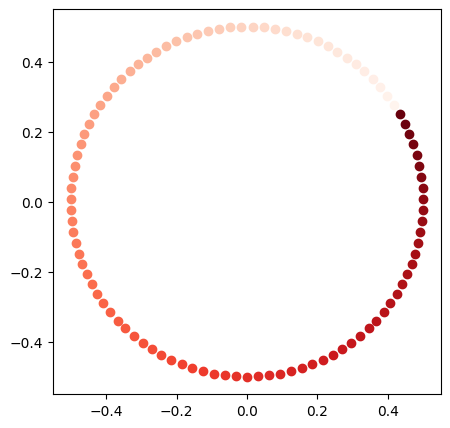

In [ ]:
from matplotlib.pyplot import cm
color = cm.Reds(np.linspace(0,1,100))
theta = model.predict(t)
plt.figure(figsize=(5,5))
for x,y,c in zip(0.5*np.cos(theta),0.5*np.sin(theta), color):
    plt.scatter(x,y,color=c)

In [ ]:
t = np.linspace(0,2,100)
omega_measured = np.pi + 0.01*np.random.normal(size=(100,))

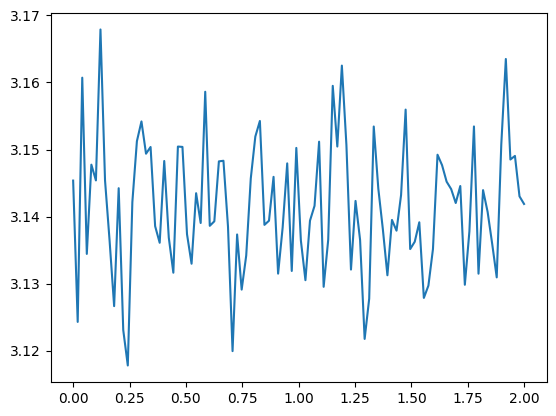

In [ ]:
plt.plot(t, omega_measured)